In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval
from itertools import chain
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
file_path = 'data/data.csv'
data = pd.read_csv(file_path)

In [ ]:
data = data.dropna(subset=['colors'])

In [ ]:
def parse_colors(color_str):    
    return [literal_eval(color) for color in color_str.split('; ')]

In [2]:
data['parsed_colors'] = data['colors'].apply(parse_colors)

data['color_vector'] = data['parsed_colors'].apply(lambda x: list(chain.from_iterable(x)))

color_vectors = np.array(data['color_vector'].tolist())

scaler = StandardScaler()
color_vectors_scaled = scaler.fit_transform(color_vectors)

n_components = min(color_vectors_scaled.shape)

n_components = min(50, n_components) 

# Apply PCA to reduce dimensionality
pca = PCA(n_components=n_components)
color_vectors_pca = pca.fit_transform(color_vectors_scaled)

# Perform K-means clustering on the reduced data
n_clusters = 10  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(color_vectors_pca)

print(data[['track_id', 'track_name', 'artists', 'cluster']].head())


/Users/pol/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 track_id                  track_name  \
0  5SuOikwiRyPMVoIQDJUgSV                      Comedy   
1  6lfxq3CG4xtTiEg7opyCyx  Can't Help Falling In Love   
2  5vjLSffimiIP26QG5WcN2K                     Hold On   
3  6Vc5wAMmXdKIAM7WUoEb7N               Say Something   
6  4mzP5mHkRvGxdhdGdAH7EJ        Give Me Your Forever   

                                artists  cluster  
0                           Gen Hoshino        4  
1                          Kina Grannis        4  
2                      Chord Overstreet        7  
3  A Great Big World;Christina Aguilera        2  
6                          Zack Tabudlo        4  


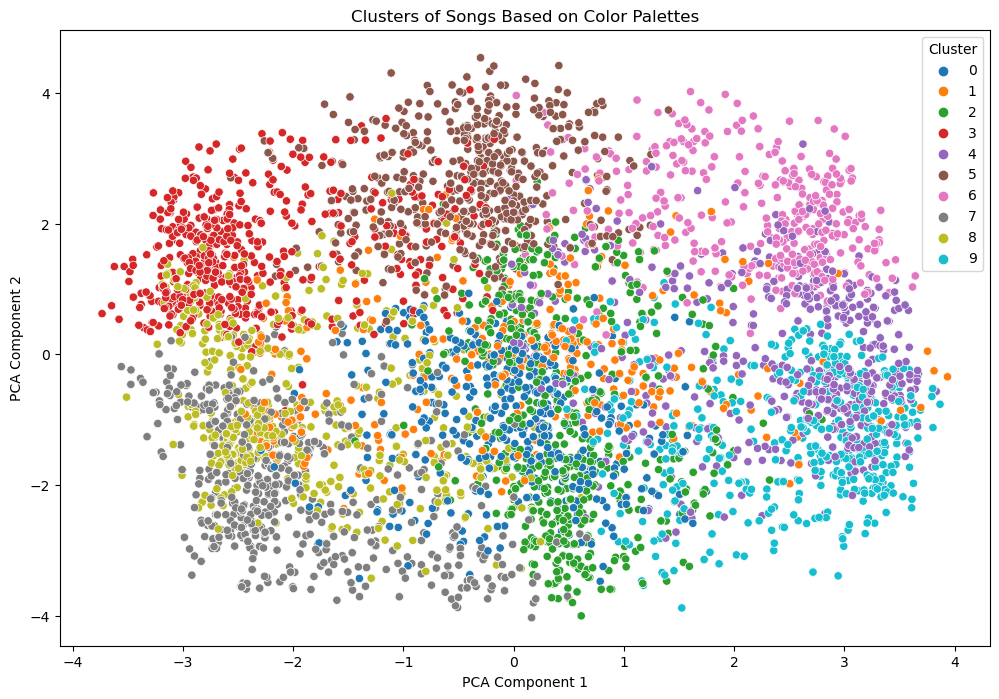

In [3]:
# Reduce to 2 principal components for 2D visualization
pca_2d = PCA(n_components=2)
color_vectors_2d = pca_2d.fit_transform(color_vectors_pca)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=color_vectors_2d[:, 0], y=color_vectors_2d[:, 1], hue=data['cluster'], palette='tab10')
plt.title('Clusters of Songs Based on Color Palettes')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


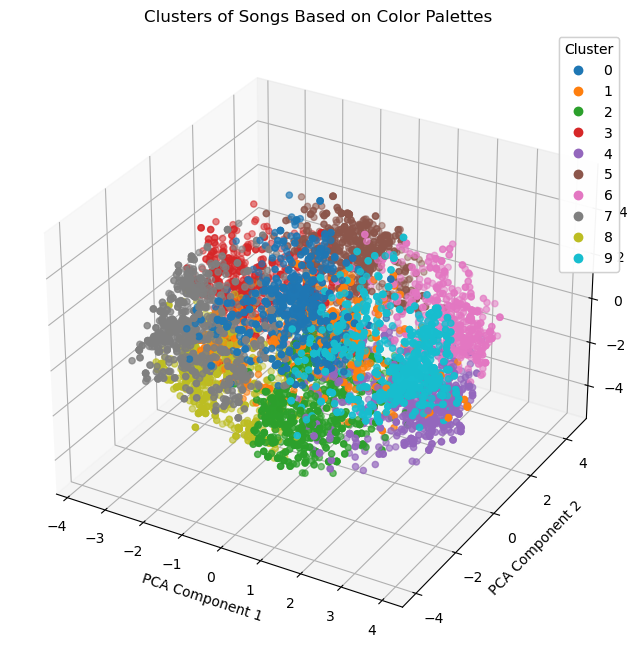

In [4]:
# Reduce to 3 principal components for 3D visualization
pca_3d = PCA(n_components=3)
color_vectors_3d = pca_3d.fit_transform(color_vectors_pca)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(color_vectors_3d[:, 0], color_vectors_3d[:, 1], color_vectors_3d[:, 2], c=data['cluster'], cmap='tab10')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
ax.set_title('Clusters of Songs Based on Color Palettes')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()


In [11]:
# Add the 3D PCA components to the dataframe
data['pca_3d_1'] = color_vectors_3d[:, 0]
data['pca_3d_2'] = color_vectors_3d[:, 1]
data['pca_3d_3'] = color_vectors_3d[:, 2]

fig = px.scatter_3d(data, x='pca_3d_1', y='pca_3d_2', z='pca_3d_3',
                    color='cluster', hover_data=['track_name', 'artists', 'track_genre'],
                    title='Clusters of Songs Based on Color Palettes',
                    labels={'pca_3d_1': 'PCA Component 1', 'pca_3d_2': 'PCA Component 2', 'pca_3d_3': 'PCA Component 3'})

fig.show()


/Users/pol/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

